In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 10

print("="*70)
print("ANALISIS SENTIMEN: KASUS SALAH TANGKAP BJORKA")
print("Tahap 3: Evaluasi & Visualisasi Hasil Sentimen")
print("="*70)

ANALISIS SENTIMEN: KASUS SALAH TANGKAP BJORKA
Tahap 3: Evaluasi & Visualisasi Hasil Sentimen


In [4]:
# 1. LOAD DATA
print("\n[1] MEMUAT DATA HASIL PELABELAN...")
print("-"*70)
df = pd.read_csv('youtube_comments_labeled.csv')
print(f"✓ Data berhasil dimuat: {len(df)} komentar")
print(f"✓ Kolom: {df.columns.tolist()}")


[1] MEMUAT DATA HASIL PELABELAN...
----------------------------------------------------------------------
✓ Data berhasil dimuat: 2177 komentar
✓ Kolom: ['clean_comment', 'char_length', 'word_count', 'sentiment_label', 'sentiment_score', 'confidence', 'prob_positive', 'prob_neutral', 'prob_negative']


In [5]:
# 2. STATISTIK UMUM
print("\n[2] STATISTIK UMUM SENTIMEN")
print("-"*70)

sentiment_counts = df['sentiment_label'].value_counts()
print("\nDistribusi Sentimen:")
for sentiment, count in sentiment_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {sentiment.capitalize():.<15} {count:>6} komentar ({percentage:>6.2f}%)")

print(f"\nTotal Komentar: {len(df)}")
print(f"Rata-rata Confidence Score: {df['confidence'].mean():.4f}")
print(f"Median Confidence Score: {df['confidence'].median():.4f}")
print(f"Std Dev Confidence Score: {df['confidence'].std():.4f}")



[2] STATISTIK UMUM SENTIMEN
----------------------------------------------------------------------

Distribusi Sentimen:
  Negative.......   1280 komentar ( 58.80%)
  Neutral........    512 komentar ( 23.52%)
  Positive.......    385 komentar ( 17.68%)

Total Komentar: 2177
Rata-rata Confidence Score: 0.8984
Median Confidence Score: 0.9747
Std Dev Confidence Score: 0.1442


In [6]:
# Confidence per sentimen
print("\nRata-rata Confidence per Sentimen:")
for sentiment in ['positive', 'neutral', 'negative']:
    if sentiment in df['sentiment_label'].values:
        avg_conf = df[df['sentiment_label'] == sentiment]['confidence'].mean()
        count = len(df[df['sentiment_label'] == sentiment])
        print(f"  {sentiment.capitalize():.<15} {avg_conf:.4f} (n={count})")


Rata-rata Confidence per Sentimen:
  Positive....... 0.8616 (n=385)
  Neutral........ 0.8633 (n=512)
  Negative....... 0.9234 (n=1280)


In [7]:
# 3. ANALISIS PANJANG KOMENTAR PER SENTIMEN
print("\n[3] ANALISIS PANJANG KOMENTAR PER SENTIMEN")
print("-"*70)
for sentiment in ['positive', 'neutral', 'negative']:
    if sentiment in df['sentiment_label'].values:
        subset = df[df['sentiment_label'] == sentiment]
        print(f"\n{sentiment.upper()}:")
        print(f"  Rata-rata panjang: {subset['char_length'].mean():.2f} karakter")
        print(f"  Rata-rata kata: {subset['word_count'].mean():.2f} kata")
        print(f"  Min-Max panjang: {subset['char_length'].min()} - {subset['char_length'].max()}")



[3] ANALISIS PANJANG KOMENTAR PER SENTIMEN
----------------------------------------------------------------------

POSITIVE:
  Rata-rata panjang: 33.34 karakter
  Rata-rata kata: 5.62 kata
  Min-Max panjang: 2 - 365

NEUTRAL:
  Rata-rata panjang: 43.27 karakter
  Rata-rata kata: 7.24 kata
  Min-Max panjang: 4 - 292

NEGATIVE:
  Rata-rata panjang: 64.98 karakter
  Rata-rata kata: 11.01 kata
  Min-Max panjang: 3 - 1157


In [8]:
# 4. ANALISIS KATA PER SENTIMEN
print("\n[4] ANALISIS KATA PER SENTIMEN")
print("-"*70)

stopwords = ['yang', 'dan', 'di', 'ini', 'itu', 'dengan', 'untuk', 
             'pada', 'ke', 'dari', 'adalah', 'ada', 'atau', 'juga',
             'tidak', 'ya', 'aja', 'sih', 'gak', 'udah', 'tuh', 'deh',
             'kok', 'nya', 'kalo', 'gue', 'gw', 'lu', 'lo', 'kan', 'nih']

def get_top_words(text_series, n=15):
    all_text = ' '.join(text_series.values)
    words = all_text.lower().split()
    filtered_words = [w for w in words if len(w) > 2 and w not in stopwords]
    return Counter(filtered_words).most_common(n)

top_words_by_sentiment = {}
for sentiment in ['positive', 'neutral', 'negative']:
    if sentiment in df['sentiment_label'].values:
        subset = df[df['sentiment_label'] == sentiment]['clean_comment']
        top_words = get_top_words(subset, 15)
        top_words_by_sentiment[sentiment] = top_words
        
        print(f"\nTop 10 Kata - {sentiment.upper()}:")
        for i, (word, count) in enumerate(top_words[:10], 1):
            print(f"  {i:2d}. {word:.<20} {count:>5} kali")


[4] ANALISIS KATA PER SENTIMEN
----------------------------------------------------------------------

Top 10 Kata - POSITIVE:
   1. bjorka..............    40 kali
   2. banget..............    31 kali
   3. bener...............    27 kali
   4. anak................    18 kali
   5. bang................    18 kali
   6. orang...............    17 kali
   7. fakta...............    16 kali
   8. indonesia...........    13 kali
   9. polisi..............    13 kali
  10. lucu................    13 kali

Top 10 Kata - NEUTRAL:
   1. bjorka..............   139 kali
   2. polisi..............    53 kali
   3. tangkap.............    26 kali
   4. tau.................    26 kali
   5. ded.................    21 kali
   6. indonesia...........    20 kali
   7. undang..............    20 kali
   8. gua.................    18 kali
   9. hacker..............    18 kali
  10. anak................    17 kali

Top 10 Kata - NEGATIVE:
   1. polisi..............   303 kali
   2. bjorka.............

In [9]:
# 5. VISUALISASI
print("\n[5] MEMBUAT VISUALISASI...")
print("-"*70)

# Create figure with subplots
fig = plt.figure(figsize=(20, 16))

# Color mapping
colors = {'positive': '#2ecc71', 'neutral': '#f39c12', 'negative': '#e74c3c'}
sentiment_colors = [colors[s] for s in sentiment_counts.index]


[5] MEMBUAT VISUALISASI...
----------------------------------------------------------------------


<Figure size 2000x1600 with 0 Axes>

Text(0.5, 1.0, 'Distribusi Sentimen Komentar\nKasus Salah Tangkap Bjorka')

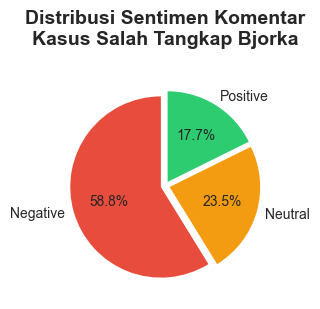

In [10]:
# 1. PIE CHART - Distribusi Sentimen
ax1 = plt.subplot(3, 3, 1)
plt.pie(sentiment_counts.values, 
        labels=[s.capitalize() for s in sentiment_counts.index],
        autopct='%1.1f%%',
        colors=sentiment_colors,
        startangle=90,
        explode=[0.05]*len(sentiment_counts))
plt.title('Distribusi Sentimen Komentar\nKasus Salah Tangkap Bjorka', 
          fontsize=14, fontweight='bold', pad=20)

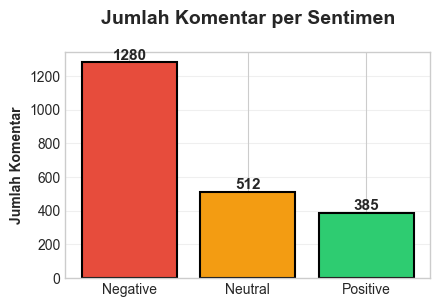

In [11]:
# 2. BAR CHART - Jumlah Sentimen
ax2 = plt.subplot(3, 3, 2)
bars = plt.bar(range(len(sentiment_counts)), sentiment_counts.values, color=sentiment_colors, edgecolor='black', linewidth=1.5)
plt.xticks(range(len(sentiment_counts)), [s.capitalize() for s in sentiment_counts.index])
plt.ylabel('Jumlah Komentar', fontweight='bold')
plt.title('Jumlah Komentar per Sentimen', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3)

# Tambahkan angka di atas bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontweight='bold', fontsize=11)

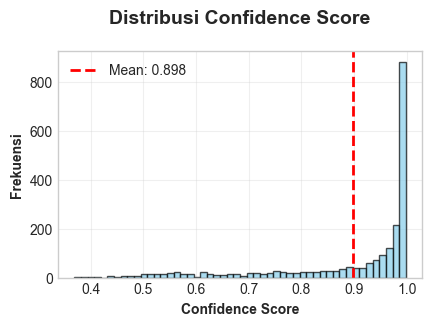

In [12]:
# 3. CONFIDENCE SCORE DISTRIBUTION
ax3 = plt.subplot(3, 3, 3)
plt.hist(df['confidence'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df['confidence'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["confidence"].mean():.3f}')
plt.xlabel('Confidence Score', fontweight='bold')
plt.ylabel('Frekuensi', fontweight='bold')
plt.title('Distribusi Confidence Score', fontsize=14, fontweight='bold', pad=20)
plt.legend()
plt.grid(alpha=0.3)

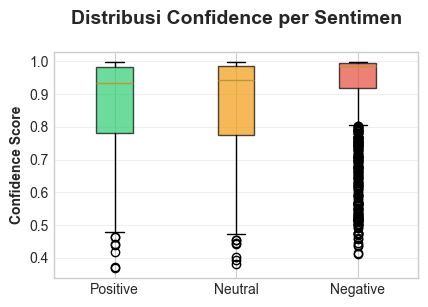

In [13]:
# 4. CONFIDENCE PER SENTIMEN (Boxplot)
ax4 = plt.subplot(3, 3, 4)
sentiment_order = ['positive', 'neutral', 'negative']
sentiment_data = [df[df['sentiment_label'] == s]['confidence'].values for s in sentiment_order if s in df['sentiment_label'].values]
bp = plt.boxplot(sentiment_data, 
                 labels=[s.capitalize() for s in sentiment_order if s in df['sentiment_label'].values],
                 patch_artist=True)

for patch, sentiment in zip(bp['boxes'], sentiment_order):
    if sentiment in df['sentiment_label'].values:
        patch.set_facecolor(colors[sentiment])
        patch.set_alpha(0.7)

plt.ylabel('Confidence Score', fontweight='bold')
plt.title('Distribusi Confidence per Sentimen', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3)

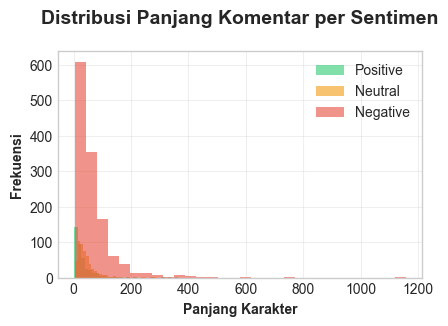

In [14]:
# 5. PANJANG KOMENTAR PER SENTIMEN
ax5 = plt.subplot(3, 3, 5)
for sentiment in sentiment_order:
    if sentiment in df['sentiment_label'].values:
        subset = df[df['sentiment_label'] == sentiment]
        plt.hist(subset['char_length'], bins=30, alpha=0.6, label=sentiment.capitalize(), color=colors[sentiment])

plt.xlabel('Panjang Karakter', fontweight='bold')
plt.ylabel('Frekuensi', fontweight='bold')
plt.title('Distribusi Panjang Komentar per Sentimen', fontsize=14, fontweight='bold', pad=20)
plt.legend()
plt.grid(alpha=0.3)

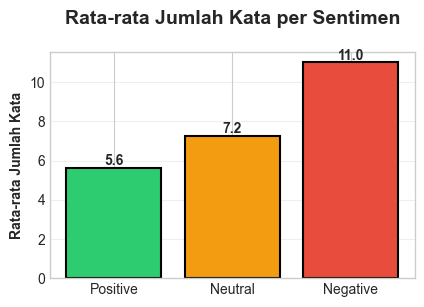

In [15]:
# 6. JUMLAH KATA PER SENTIMEN
ax6 = plt.subplot(3, 3, 6)
sentiment_word_avg = [df[df['sentiment_label'] == s]['word_count'].mean() 
                      for s in sentiment_order if s in df['sentiment_label'].values]
bars = plt.bar(range(len(sentiment_word_avg)), sentiment_word_avg, 
               color=[colors[s] for s in sentiment_order if s in df['sentiment_label'].values],
               edgecolor='black', linewidth=1.5)
plt.xticks(range(len(sentiment_word_avg)), 
           [s.capitalize() for s in sentiment_order if s in df['sentiment_label'].values])
plt.ylabel('Rata-rata Jumlah Kata', fontweight='bold')
plt.title('Rata-rata Jumlah Kata per Sentimen', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom', fontweight='bold')

✓ Visualisasi utama disimpan: 'sentiment_analysis_visualization.png'


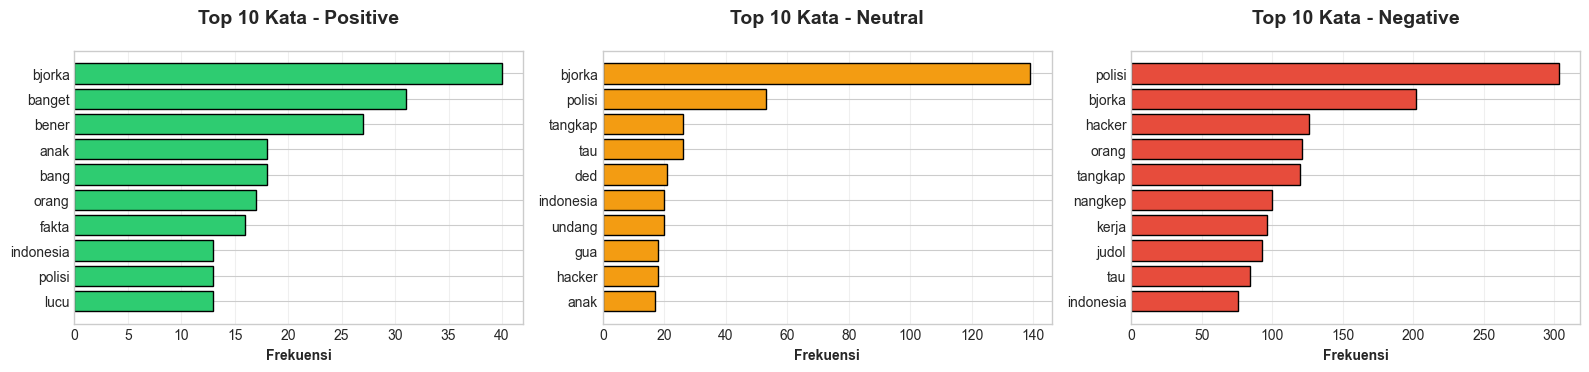

In [16]:
# TOP WORDS PER SENTIMENT (Horizontal Bar Charts)
positions = [(3, 3, 7), (3, 3, 8), (3, 3, 9)]
for idx, (sentiment, pos) in enumerate(zip(sentiment_order, positions)):
    if sentiment in top_words_by_sentiment:
        ax = plt.subplot(*pos)
        words, counts = zip(*top_words_by_sentiment[sentiment][:10])
        y_pos = np.arange(len(words))
        plt.barh(y_pos, counts, color=colors[sentiment], edgecolor='black', linewidth=1)
        plt.yticks(y_pos, words)
        plt.xlabel('Frekuensi', fontweight='bold')
        plt.title(f'Top 10 Kata - {sentiment.capitalize()}', 
                  fontsize=14, fontweight='bold', pad=20)
        plt.gca().invert_yaxis()
        plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('sentiment_analysis_visualization.png', dpi=300, bbox_inches='tight')
print("✓ Visualisasi utama disimpan: 'sentiment_analysis_visualization.png'")


[6] MEMBUAT WORD CLOUDS PER SENTIMEN...
----------------------------------------------------------------------
✓ Word clouds disimpan: 'wordcloud_per_sentiment.png'


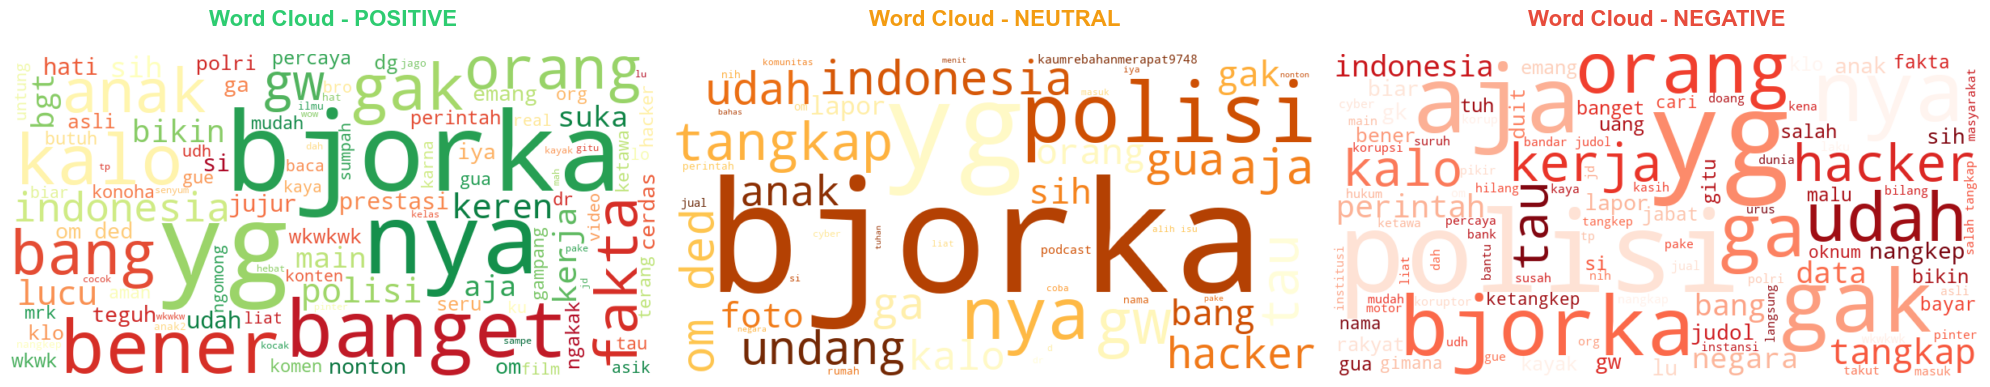

In [17]:
# WORD CLOUDS PER SENTIMEN
print("\n[6] MEMBUAT WORD CLOUDS PER SENTIMEN...")
print("-"*70)

fig2, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, sentiment in enumerate(sentiment_order):
    if sentiment in df['sentiment_label'].values:
        text = ' '.join(df[df['sentiment_label'] == sentiment]['clean_comment'].values)
        
        wordcloud = WordCloud(width=800, height=400,
                            background_color='white',
                            colormap='RdYlGn' if sentiment == 'positive' else 
                                     'YlOrBr' if sentiment == 'neutral' else 'Reds',
                            max_words=100,
                            relative_scaling=0.5,
                            min_font_size=10).generate(text)
        
        axes[idx].imshow(wordcloud, interpolation='bilinear')
        axes[idx].axis('off')
        axes[idx].set_title(f'Word Cloud - {sentiment.upper()}', 
                           fontsize=16, fontweight='bold', pad=20,
                           color=colors[sentiment])

plt.tight_layout()
plt.savefig('wordcloud_per_sentiment.png', dpi=300, bbox_inches='tight')
print("✓ Word clouds disimpan: 'wordcloud_per_sentiment.png'")

In [18]:
# 7. ANALISIS CONFIDENCE THRESHOLD
print("\n[7] ANALISIS CONFIDENCE THRESHOLD")
print("-"*70)

thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]
print("\nJumlah komentar dengan confidence >= threshold:")
for threshold in thresholds:
    count = len(df[df['confidence'] >= threshold])
    percentage = (count / len(df)) * 100
    print(f"  Threshold {threshold:.1f}: {count:>5} komentar ({percentage:>5.2f}%)")


[7] ANALISIS CONFIDENCE THRESHOLD
----------------------------------------------------------------------

Jumlah komentar dengan confidence >= threshold:
  Threshold 0.5:  2133 komentar (97.98%)
  Threshold 0.6:  2008 komentar (92.24%)
  Threshold 0.7:  1900 komentar (87.28%)
  Threshold 0.8:  1749 komentar (80.34%)
  Threshold 0.9:  1515 komentar (69.59%)


In [19]:
# Low confidence comments
low_conf_threshold = 0.6
low_conf = df[df['confidence'] < low_conf_threshold]
print(f"\nKomentar dengan confidence rendah (<{low_conf_threshold}):")
print(f"  Total: {len(low_conf)} komentar ({len(low_conf)/len(df)*100:.2f}%)")
if len(low_conf) > 0:
    print(f"  Distribusi sentimen pada low confidence:")
    for sentiment in sentiment_order:
        if sentiment in low_conf['sentiment_label'].values:
            count = len(low_conf[low_conf['sentiment_label'] == sentiment])
            print(f"    {sentiment.capitalize():.<15} {count:>5}")


Komentar dengan confidence rendah (<0.6):
  Total: 169 komentar (7.76%)
  Distribusi sentimen pada low confidence:
    Positive.......    43
    Neutral........    57
    Negative.......    69


In [20]:
# 8. CONTOH KOMENTAR REPRESENTATIF
print("\n[8] CONTOH KOMENTAR REPRESENTATIF")
print("-"*70)

for sentiment in sentiment_order:
    if sentiment in df['sentiment_label'].values:
        print(f"\n{'='*70}")
        print(f"{sentiment.upper()} - High Confidence (Top 3)")
        print('='*70)
        
        high_conf = df[df['sentiment_label'] == sentiment].nlargest(3, 'confidence')
        for idx, row in high_conf.iterrows():
            print(f"\n#{idx+1} | Confidence: {row['confidence']:.4f} | {row['word_count']} kata")
            print(f"   {row['clean_comment'][:200]}{'...' if len(row['clean_comment']) > 200 else ''}")



[8] CONTOH KOMENTAR REPRESENTATIF
----------------------------------------------------------------------

POSITIVE - High Confidence (Top 3)

#801 | Confidence: 0.9972 | 7 kata
   gaya bicara penyampaiann aa teguh enak banget

#507 | Confidence: 0.9972 | 1 kata
   mantap

#1435 | Confidence: 0.9972 | 14 kata
   422 sumpah estetik banget transisi halus warnawarnanya bikin adem 855dan musik latar cocok banget

NEUTRAL - High Confidence (Top 3)

#941 | Confidence: 0.9983 | 5 kata
   nirvana090 cek mutasi uang kmna

#1812 | Confidence: 0.9981 | 6 kata
   tau undang om dedy muncul ig

#1922 | Confidence: 0.9980 | 6 kata
   bang ded coba undang pace komputer

NEGATIVE - High Confidence (Top 3)

#2098 | Confidence: 0.9983 | 7 kata
   malu dengernya ah simpan hati aja aib

#1943 | Confidence: 0.9983 | 10 kata
   sok sok nangkep hacker brantas judol aja ga kelar kelar

#2127 | Confidence: 0.9982 | 3 kata
   bikin malu aja


In [21]:
# 9. LAPORAN LENGKAP
print("\n[9] MENYIMPAN LAPORAN LENGKAP...")
print("-"*70)

report_file = 'sentiment_analysis_report.txt'
with open(report_file, 'w', encoding='utf-8') as f:
    f.write("="*70 + "\n")
    f.write("LAPORAN ANALISIS SENTIMEN\n")
    f.write("Kasus Salah Tangkap Bjorka - Komentar YouTube\n")
    f.write("="*70 + "\n\n")
    
    f.write("1. RINGKASAN EKSEKUTIF\n")
    f.write("-"*70 + "\n")
    f.write(f"Total Komentar Dianalisis: {len(df):,}\n")
    f.write(f"Periode Analisis: Data dari YouTube\n")
    f.write(f"Metode: IndoBERT Sentiment Classification\n\n")
    
    f.write("2. DISTRIBUSI SENTIMEN\n")
    f.write("-"*70 + "\n")
    for sentiment, count in sentiment_counts.items():
        percentage = (count / len(df)) * 100
        f.write(f"{sentiment.capitalize():.<20} {count:>8} ({percentage:>6.2f}%)\n")
    
    # Temuan utama
    dominant_sentiment = sentiment_counts.idxmax()
    dominant_pct = (sentiment_counts.max() / len(df)) * 100
    
    f.write(f"\n3. TEMUAN UTAMA\n")
    f.write("-"*70 + "\n")
    f.write(f"• Sentimen dominan: {dominant_sentiment.upper()} ({dominant_pct:.1f}%)\n")
    f.write(f"• Rata-rata confidence score: {df['confidence'].mean():.4f}\n")
    f.write(f"• Komentar dengan high confidence (>0.8): {len(df[df['confidence'] > 0.8])} ({len(df[df['confidence'] > 0.8])/len(df)*100:.1f}%)\n")
    
    f.write(f"\n4. KARAKTERISTIK KOMENTAR PER SENTIMEN\n")
    f.write("-"*70 + "\n")
    for sentiment in sentiment_order:
        if sentiment in df['sentiment_label'].values:
            subset = df[df['sentiment_label'] == sentiment]
            f.write(f"\n{sentiment.upper()}:\n")
            f.write(f"  Jumlah: {len(subset)} komentar\n")
            f.write(f"  Rata-rata panjang: {subset['char_length'].mean():.1f} karakter\n")
            f.write(f"  Rata-rata kata: {subset['word_count'].mean():.1f} kata\n")
            f.write(f"  Rata-rata confidence: {subset['confidence'].mean():.4f}\n")
    
    f.write(f"\n5. KATA KUNCI PER SENTIMEN\n")
    f.write("-"*70 + "\n")
    for sentiment in sentiment_order:
        if sentiment in top_words_by_sentiment:
            f.write(f"\n{sentiment.upper()} - Top 15:\n")
            for i, (word, count) in enumerate(top_words_by_sentiment[sentiment], 1):
                f.write(f"  {i:2d}. {word:.<25} {count:>5}\n")
    
    f.write(f"\n6. KESIMPULAN\n")
    f.write("-"*70 + "\n")
    f.write(f"Berdasarkan analisis {len(df):,} komentar YouTube terkait kasus salah\n")
    f.write(f"tangkap Bjorka, sentimen publik didominasi oleh sentimen {dominant_sentiment}\n")
    f.write(f"dengan persentase {dominant_pct:.1f}%. Rata-rata confidence score\n")
    f.write(f"sebesar {df['confidence'].mean():.4f} menunjukkan tingkat keyakinan model\n")
    f.write(f"yang {'baik' if df['confidence'].mean() > 0.7 else 'cukup'} dalam klasifikasi sentimen.\n")

print(f"✓ Laporan lengkap disimpan: '{report_file}'")


[9] MENYIMPAN LAPORAN LENGKAP...
----------------------------------------------------------------------
✓ Laporan lengkap disimpan: 'sentiment_analysis_report.txt'
